In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('tweet.csv', encoding='ISO-8859-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
apple_google_df = df[df['emotion_in_tweet_is_directed_at'].str.contains('Apple|Google', na=False, case=False)]
# Display the count of tweets
apple_google_count = apple_google_df['emotion_in_tweet_is_directed_at'].value_counts()
print(apple_google_count)

# Display the first few rows of this filtered data
print(apple_google_df.head())

emotion_in_tweet_is_directed_at
Apple                              661
Google                             430
Other Google product or service    293
Other Apple product or service      35
Name: count, dtype: int64
                                           tweet_text  \
4   @sxtxstate great stuff on Fri #SXSW: Marissa M...   
9   Counting down the days to #sxsw plus strong Ca...   
13  Gotta love this #SXSW Google Calendar featurin...   
27  someone started an #austin @PartnerHub group i...   
38  @mention  - False Alarm: Google Circles Not Co...   

    emotion_in_tweet_is_directed_at  \
4                            Google   
9                             Apple   
13  Other Google product or service   
27  Other Google product or service   
38                           Google   

   is_there_an_emotion_directed_at_a_brand_or_product  
4                                    Positive emotion  
9                                    Positive emotion  
13                                   Pos

In [6]:
# Check for missing values
missing_values = apple_google_df.isnull().sum()
print(missing_values)

# Drop rows with missing sentiment labels
apple_google_df.dropna(subset=['emotion_in_tweet_is_directed_at'], inplace=True)

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64


<ipython-input-6-0ec0e54eb043>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_google_df.dropna(subset=['emotion_in_tweet_is_directed_at'], inplace=True)


In [7]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the sentiment labels
apple_google_df['sentiment_encoded'] = label_encoder.fit_transform(apple_google_df['is_there_an_emotion_directed_at_a_brand_or_product'])

# Display the unique classes and their encoded labels
print(label_encoder.classes_)
print(apple_google_df[['is_there_an_emotion_directed_at_a_brand_or_product', 'sentiment_encoded']].head())


["I can't tell" 'Negative emotion' 'No emotion toward brand or product'
 'Positive emotion']
   is_there_an_emotion_directed_at_a_brand_or_product  sentiment_encoded
4                                    Positive emotion                  3
9                                    Positive emotion                  3
13                                   Positive emotion                  3
27                                   Positive emotion                  3
38                                   Negative emotion                  1


<ipython-input-7-73f45a4f217f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_google_df['sentiment_encoded'] = label_encoder.fit_transform(apple_google_df['is_there_an_emotion_directed_at_a_brand_or_product'])


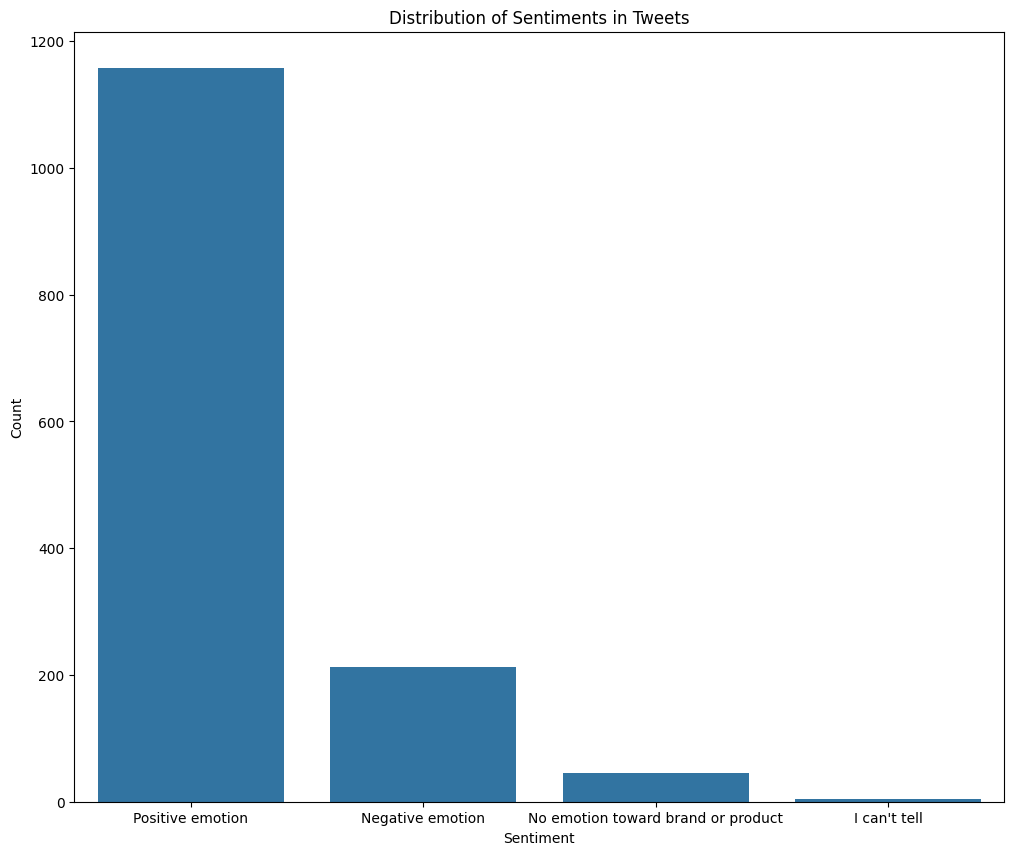

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment classes
plt.figure(figsize=(12, 10))
sns.countplot(data=apple_google_df, x='is_there_an_emotion_directed_at_a_brand_or_product')
plt.title('Distribution of Sentiments in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transform the tweet texts into TF-IDF features
X = tfidf_vectorizer.fit_transform(apple_google_df['tweet_text']).toarray()
y = apple_google_df['sentiment_encoded']

print(X.shape)  # Shape of the TF-IDF features


(1419, 3235)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the unique values in the encoded sentiment column
print(apple_google_df['sentiment_encoded'].unique())

# Check the classes in the label encoder
print(label_encoder.classes_)


[3 1 2 0]
["I can't tell" 'Negative emotion' 'No emotion toward brand or product'
 'Positive emotion']
